### HW2 - Standard Toy Models and Priors

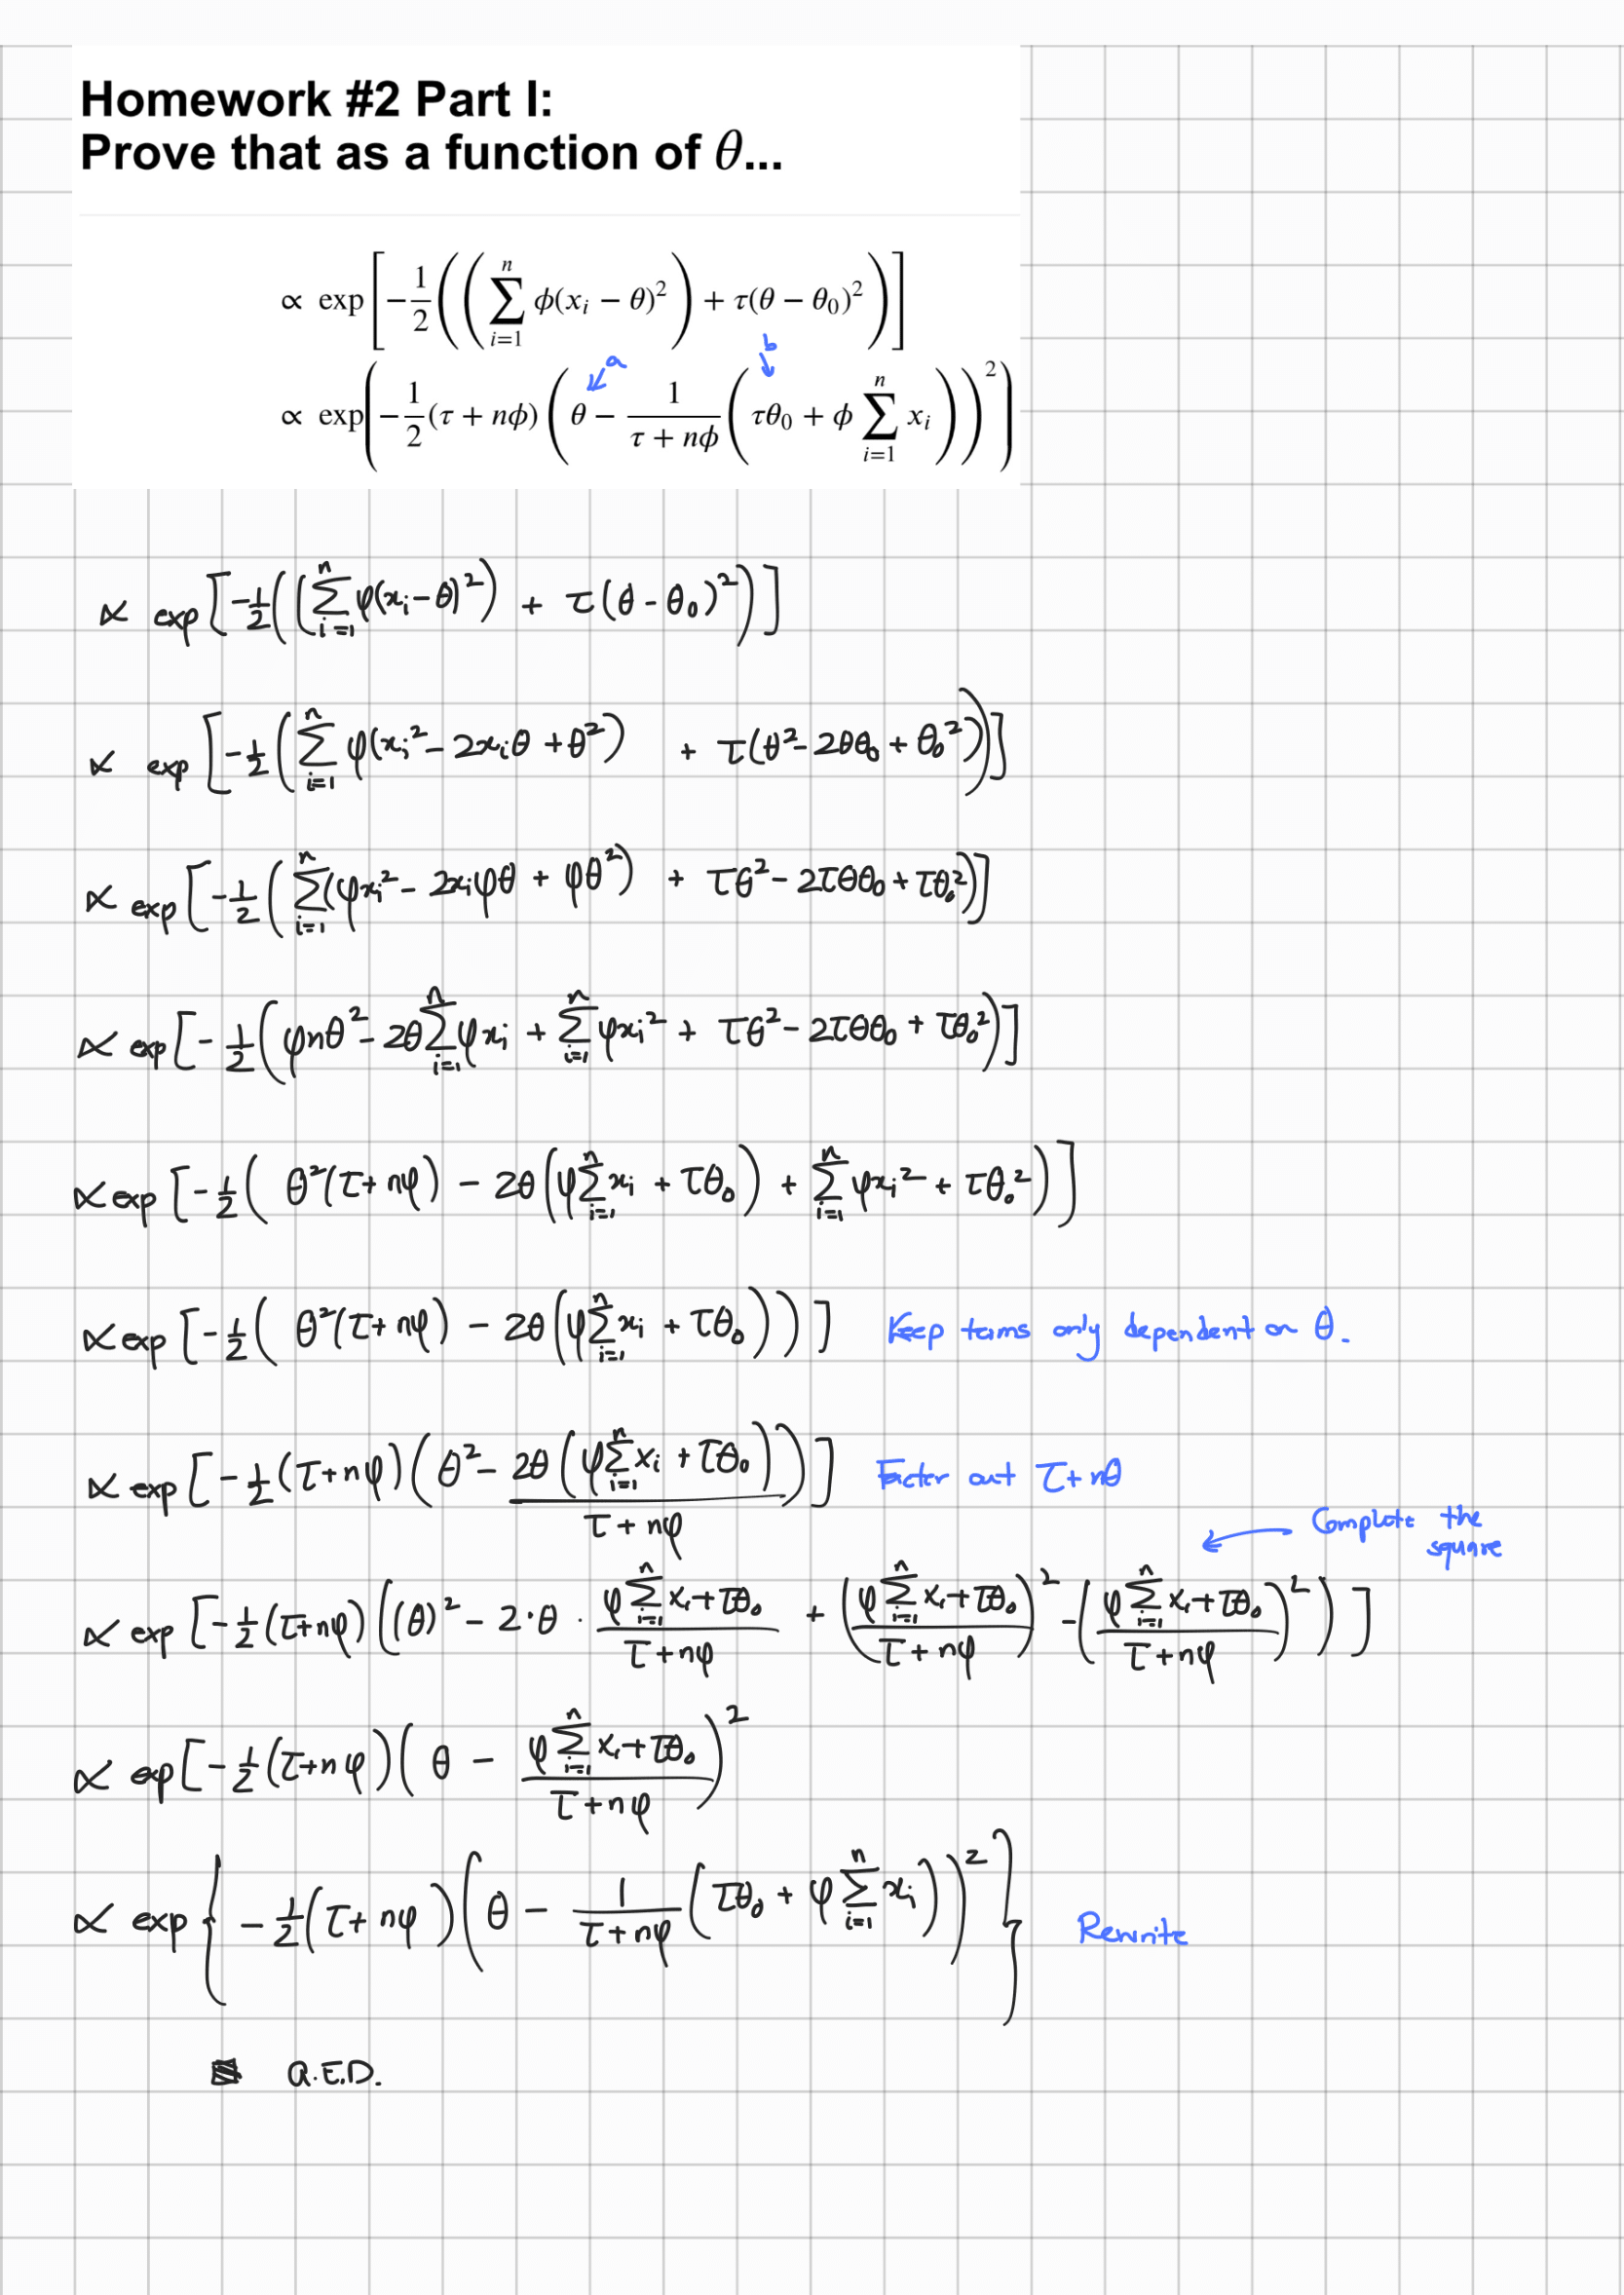

In [21]:
from IPython.display import Image

# Embed PDF in a Jupyter Notebook cell
Image("HW2 - Part 1 Picture.png", width=800, height=500)

In [8]:
# Import relevant libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#### Classic Bayes Figure, taken from Lecture Notebook

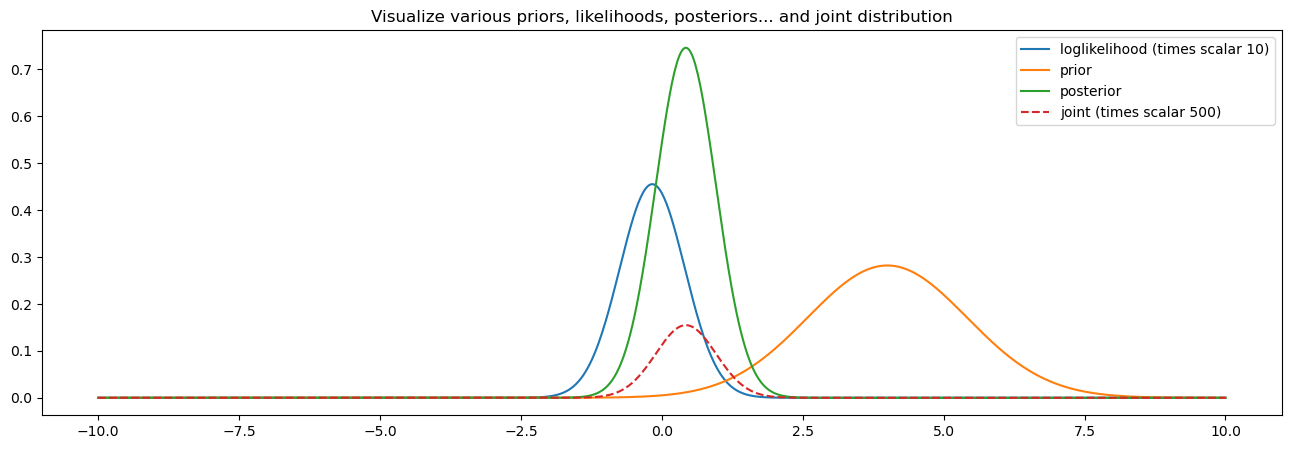

In [9]:
# Set seed to ensure we look at the same samples of observations
np.random.seed(1000)

n = 3
x = stats.norm(loc=0,scale=1).rvs(n)
theta_0,tau = 4,1/2
parameter_domain = np.linspace(-10,10,1001)
likelihood = stats.norm.pdf((x[:,np.newaxis])*np.ones(parameter_domain.shape), # joint likelihood 
                            loc=parameter_domain, scale=1).prod(axis=0) # sigma=1 known
prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain) # What if p(theta) = 1?
c,c2 = 500,10
joint = c*likelihood*prior # elementwise multiplication 
posterior = stats.norm(loc=(tau*theta_0+x.sum())/(tau+n), scale=1/(tau+n)**0.5).pdf(parameter_domain)
plt.figure(figsize=(16,5))
plt.plot(parameter_domain, c2*likelihood, label="loglikelihood (times scalar "+str(c2)+")")
plt.plot(parameter_domain, prior, label="prior"); plt.plot(parameter_domain, posterior, label="posterior")
plt.plot(parameter_domain, joint, linestyle="--", label="joint (times scalar "+str(c)+")")
plt.legend()
plt.title("Visualize various priors, likelihoods, posteriors... and joint distribution"); 

#### Plotting each observations likelihood

Text(0.5, 1.0, 'Classic Bayes Figure with Individual Likelihoods')

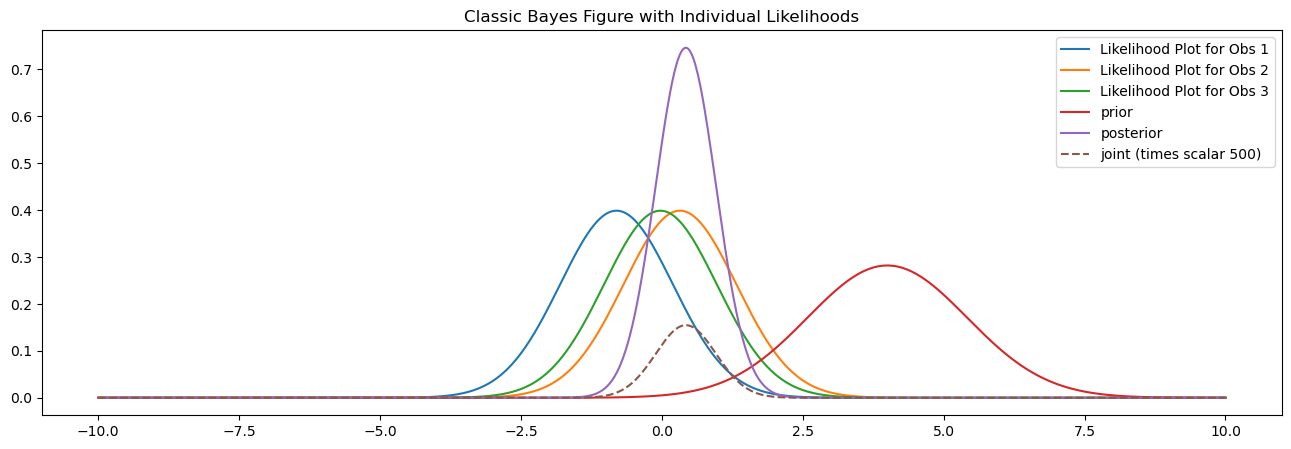

In [10]:
plt.figure(figsize=(16,5))

# Initialize joint distribution to be the prior, we will multiply this with each likelihood to get the joint likelihood
joint = prior

# Plot each observations likelihood
for obs in range(len(x)):
    obs_likelihood = stats.norm.pdf(x[obs], loc=parameter_domain, scale=1)
    joint = joint*obs_likelihood
    plt.plot(parameter_domain, obs_likelihood, label="Likelihood Plot for Obs {}".format(int(obs)  + 1))


joint= c*joint

posterior = stats.norm(loc=(tau*theta_0+x.sum())/(tau+n), scale=1/(tau+n)**0.5).pdf(parameter_domain) 
plt.plot(parameter_domain, prior, label="prior")
plt.plot(parameter_domain, posterior, label="posterior")
plt.plot(parameter_domain, joint, linestyle="--", label="joint (times scalar "+str(c)+")")
plt.legend()
plt.title("Classic Bayes Figure with Individual Likelihoods")

#### Classic Bayes Figure with a Log-Scaling

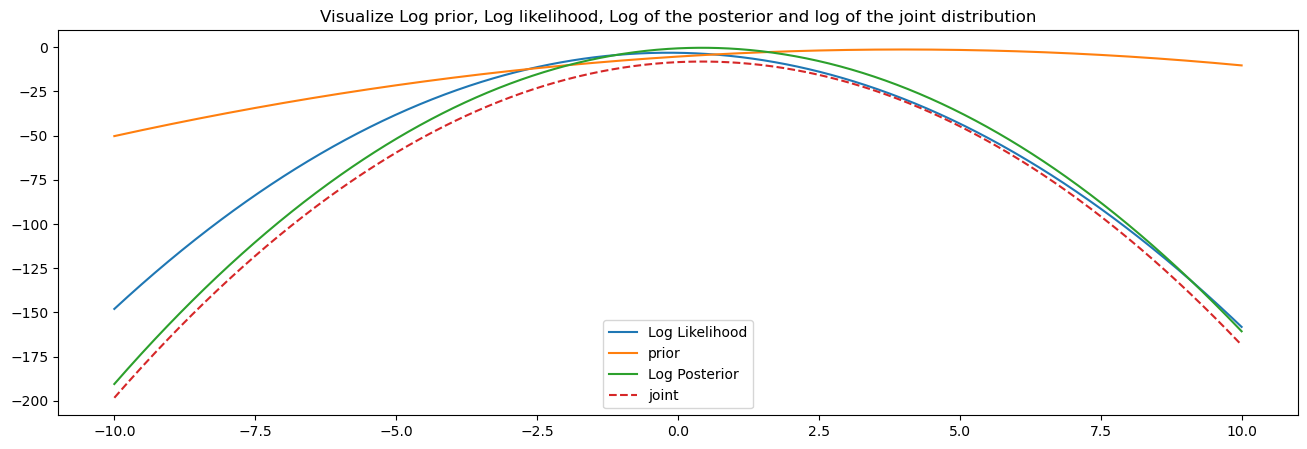

In [14]:
theta_0, tau = 4, 1/2
parameter_domain = np.linspace(-10,10,1001)


# Apply log(*) to the likelihood function to get a sum instead of a product 
log_likelihood = np.sum(stats.norm.logpdf((x[:,np.newaxis])*np.ones(parameter_domain.shape), 
                            loc=parameter_domain, scale=1), axis=0)
# Log_prior 
log_prior = stats.norm(loc=theta_0, scale=1/tau**0.5).logpdf(parameter_domain) 

# We add the terms instead, due to log function 
joint = (log_likelihood + log_prior) 

# Log_posterior
posterior = stats.norm(loc=(tau*theta_0+x.sum())/(tau+n), scale=1/(tau+n)**0.5).logpdf(parameter_domain)


plt.figure(figsize=(16,5))
plt.plot(parameter_domain, log_likelihood, label="Log Likelihood")
plt.plot(parameter_domain, log_prior, label="prior"); plt.plot(parameter_domain, posterior, label="Log Posterior")
plt.plot(parameter_domain, joint, linestyle="--", label="joint")
plt.legend()
plt.title("Visualize Log prior, Log likelihood, Log of the posterior and log of the joint distribution"); 

### What is the posterior distribution of a normal likelihood with  p(θ)∝1

##### An improper prior (e.g.  p(θ)∝1) with a normal likelihood will result in a normal posterior distribution. This is because the prior is a flat line and when multiplied by a normal likelihood, will produce another normal distribution - the posterior.

### How do log likelihoods and posteriors differ from each other as a result of improper prior and marginal likelihood constants?

##### 
- An improper prior is a prior distribution that does not integrate to one over the entire parameter space. This means that it's not a valid probability distribution because it doesn't have a finite total probability. Improper priors can lead to improper posteriors, which also do not integrate to one and thus don't represent valid probability distributions. This can happen if the likelihood does not provide sufficient 'information' to counteract the 'infinite' nature of the prior. However, in some cases, even with an improper prior, the resulting posterior can still be a valid probability density (e.g. the case above). 

- The marginal likelihood is the integral of the product of the likelihood and the prior over the entire parameter space. For marginal likelihood constants, an improper prior may lead to the marginal likelihood being infinite, which means that the posterior cannot be normalized and hence is not a valid probability distribution.

- Log likelihoods are only concerned with the observed data and the model parameters. They do not incorporate prior beliefs or information about the parameter distribution. Thus, an improper prior will not affect it directly - but it will impact the posterior.


- Log likelihoods and posteriors can be dramatically affected by the choice of priors and the consideration of marginal likelihood constants. 


